In [2]:
import netCDF4 as nc
import wrf
import numpy as np
import matplotlib.pyplot as plt
import kinDriver as kd


In [8]:
import glob
fs=sorted(glob.glob("/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-2*"))
print(fs)
def readWRF_File(f):
    with nc.Dataset(f) as wfile:
        xlong=wfile.variables['XLONG'][0,:,:]
        xlat=wfile.variables['XLAT'][0,:,:]
        press=wfile.variables['P'][:,:,:,:]+wfile.variables['PB'][:,:,:,:]
        theta=wfile.variables['T'][:,:,:,:]+300
        qv=wfile.variables['QVAPOR'][:,:,:,:]
        qr=wfile.variables['QRAIN'][:,:,:,:]
        qs=wfile.variables['QSNOW'][:,:,:,:]
        qg=wfile.variables['QGRAUP'][:,:,:,:]
        qh=wfile.variables['QHAIL'][:,:,:,:]
        qc=wfile.variables['QCLOUD'][:,:,:,:]
        qi=wfile.variables['QICE'][:,:,:,:]
        u=0.5*(wfile.variables['U'][:,:,:,1:]+wfile.variables['U'][:,:,:,0:-1])
        v=0.5*(wfile.variables['V'][:,:,1:,:]+wfile.variables['V'][:,:,0:-1,:])
        dbz=wrf.getvar(wfile,'dbz',timeidx=wrf.ALL_TIMES)
        height=wfile.variables['PH'][:,:,:,:]+wfile.variables['PHB'][:,:,:,:]
        height=height/9.81
        height_surf=wfile.variables['HGT'][0,:,:]
    return xlong,xlat,press,theta,qv,qs,qg,qh,qr,qc,qi,u,v,height_surf,dbz,height

def readWRF_File_Morr(f):
    with nc.Dataset(f) as wfile:
        xlong=wfile.variables['XLONG'][0,:,:]
        xlat=wfile.variables['XLAT'][0,:,:]
        press=wfile.variables['P'][:,:,:,:]+wfile.variables['PB'][:,:,:,:]
        theta=wfile.variables['T'][:,:,:,:]+300
        qv=wfile.variables['QVAPOR'][:,:,:,:]
        qr=wfile.variables['QRAIN'][:,:,:,:]
        qs=wfile.variables['QSNOW'][:,:,:,:]
        qg=wfile.variables['QGRAUP'][:,:,:,:]
        qc=wfile.variables['QCLOUD'][:,:,:,:]
        qi=wfile.variables['QICE'][:,:,:,:]
        qnice=wfile.variables['QNICE'][:,:,:,:]
        qnr=wfile.variables['QNRAIN'][:,:,:,:]
        qns=wfile.variables['QNSNOW'][:,:,:,:]
        qng=wfile.variables['QNGRAUPEL'][:,:,:,:]
        u=0.5*(wfile.variables['U'][:,:,:,1:]+wfile.variables['U'][:,:,:,0:-1])
        v=0.5*(wfile.variables['V'][:,:,1:,:]+wfile.variables['V'][:,:,0:-1,:])
        dbz=wrf.getvar(wfile,'dbz',timeidx=wrf.ALL_TIMES)
        height=wfile.variables['PH'][:,:,:,:]+wfile.variables['PHB'][:,:,:,:]
        height=height/9.81
        height_surf=wfile.variables['HGT'][0,:,:]
    return xlong,xlat,press,theta,qv,qs,qg,qr,qc,qi,u,v,height_surf,dbz,height,qns,qng,qnr,qnice

xlong,xlat,press,theta,qv,qs,qg,qr,qc,qi,u,v,height_surf,\
    dbz,height,qns,qng,qnr,qnice=readWRF_File_Morr(fs[7])

['/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-24_21:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-24_22:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-24_23:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_00:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_01:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_02:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_03:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_04:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_05:00:00', '/Users/mgrecu/WDomains/MCS_OK/wrfout_d03_2018-06-25_06:00:00']


(15, 83, 125)


/Users/mgrecu/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


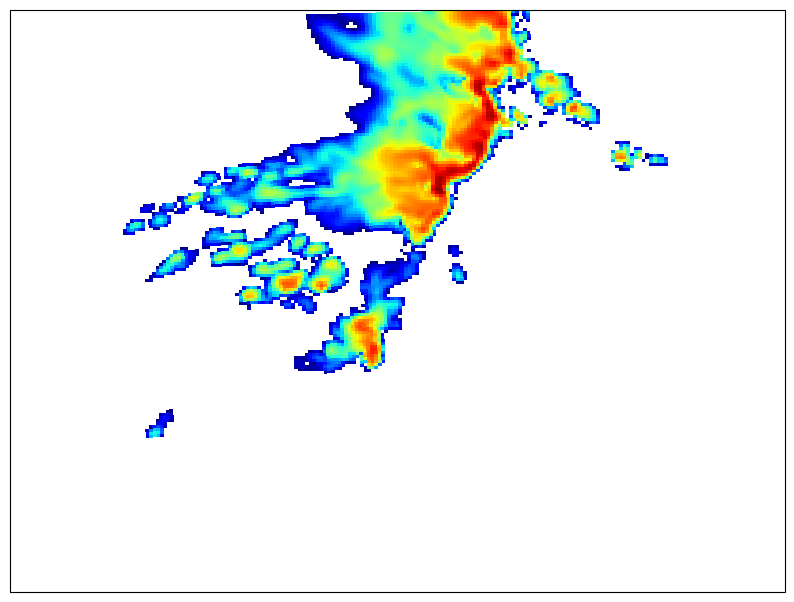

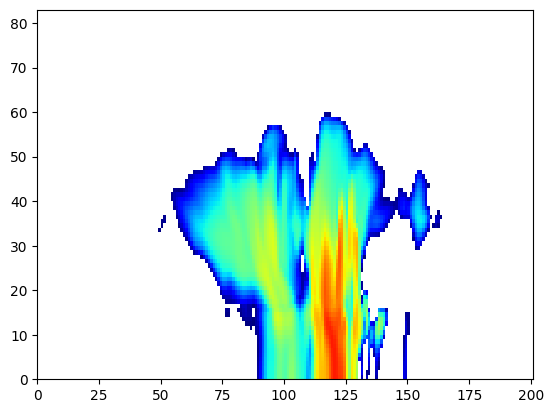

In [16]:
import numpy as np
dbzm=np.ma.array(dbz,mask=dbz<0)
import cartopy.crs as ccrs
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
plt.pcolormesh(xlong,xlat,dbzm[-1,0,:,:],cmap='jet',vmin=0,vmax=60)
plt.figure()
plt.pcolormesh(dbzm[-1,:,150,:],cmap='jet',vmin=0,vmax=60)
#print(dbzm[-1,:,150,125])
n1=50
n2=175
j0=150
qs2d=qs[-1,:,j0,n1:n2]
qr2d=qr[-1,:,j0,n1:n2]
qc2d=qc[-1,:,j0,n1:n2]
qi2d=qi[-1,:,j0,n1:n2]
qg2d=qg[-1,:,j0,n1:n2]
qns2d=qns[-1,:,j0,n1:n2]
qnr2d=qnr[-1,:,j0,n1:n2]
qni2d=qnice[-1,:,j0,n1:n2]
qng2d=qng[-1,:,j0,n1:n2]
qnv2d=qv[-1,:,j0,n1:n2]
press2d=press[-1,:,j0,n1:n2]
temp2d=theta[-1,:,j0,n1:n2]*(press2d/1e5)**(287/1004)
dtemp2d_wrf=(theta[-1,:,j0,n1:n2]-theta[-2,:,j0,n1:n2])*(press2d/1e5)**(287/1004)
dz2d_wrf=height[-1,1:,j0,n1:n2]-height[-1,:-1,j0,n1:n2]
dbz2d=dbzm[-1,:,j0,n1:n2]
input_data=[qs2d,qr2d,qc2d,qi2d,qg2d,qns2d,qnr2d,qni2d,qng2d,qnv2d,press2d,temp2d,dz2d_wrf,dbz2d,dtemp2d_wrf]
input_data=np.array(input_data)
print(input_data.shape)
import xarray as xr
inputDatax=xr.DataArray(input_data,dims=['fields','nz','nx'])
ds=xr.Dataset({'input_data':inputDatax})
ds.to_netcdf('input_data.nc')

In [5]:
dt1=10
ni2d=qi2d.copy()*0
ns2d=qs2d.copy()*0
nr2d=qr2d.copy()*0
ng2d=qg2d.copy()*0
w2d=qr2d.copy()*0
#print(dz2d_wrf[:,0])
inputData=[temp2d[:80,:],press2d[:80,:],dz2d_wrf[:80,:],qv2d[:80,:],qr2d[:80,:],\
     qi2d[:80,:],ni2d[:80,:],qs2d[:80,:],qg2d[:80,:],ns2d[:80,:],nr2d[:80,:],ng2d[:80,:],w2d[:80,:],dt1]

import pickle
pickle.dump(inputData,open('inputData.pkl','wb'))
kd.mphys_morrison_interface_2d(temp2d[:80,:],press2d[:80,:],dz2d_wrf[:80,:],qv2d[:80,:],qr2d[:80,:],\
     qi2d[:80,:],ni2d[:80,:],qs2d[:80,:],qg2d[:80,:],ns2d[:80,:],nr2d[:80,:],ng2d[:80,:],w2d[:80,:],dt1)

          80          80           1           1
